Step 1. Import the necessary libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2. Import the dataset from this address.


Step 3. Assign it to a variable called chipo.

In [85]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

Step 4. See the first 10 entries

In [86]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [87]:
nb_observ = chipo.shape[0]
print("the number of observations in the dataset is:", nb_observ)

the number of observations in the dataset is: 4622


Step 6. What is the number of columns in the dataset?

In [88]:
nb_columns = chipo.shape[1]
print("the number of columns in the dataset is:", nb_columns)

the number of columns in the dataset is: 5


Step 7. Print the name of all the columns.

In [89]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [90]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [91]:
df = chipo.groupby('item_name').agg({'order_id': 'count', 'quantity': 'sum'})
most_ordered_item = df.sort_values(by='order_id', ascending=False).head(1)
most_ordered_item

,order_id,quantity
item_name,,
Chicken Bowl,726,761


Step 10. For the most-ordered item, how many items were ordered?

In [92]:
print("The quantity of items are : ",most_ordered_item['quantity'].values[0])

The quantity of items are :  761


Step 11. What was the most ordered item in the choice_description column?

In [93]:
df = chipo.groupby('choice_description').agg({'order_id': 'count', 'quantity': 'sum'})
most_ordered_choice = df.sort_values(by='order_id', ascending=False).head(1)
most_ordered_choice

,order_id,quantity
choice_description,,
[Diet Coke],134,159


Step 12. How many items were orderd in total?

In [94]:
chipo['quantity'].sum()

4972

Step 13. Turn the item price into a float

Step 13.a. Check the item price type

In [95]:
chipo['item_price'].dtypes

dtype('O')

Le type de données "O" signifie "object",cela indique généralement que la colonne contient des données de type chaîne de caractères (string). 

Step 13.b. Create a lambda function and change the type of item price

In [96]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))  

Step 13.c. Check the item price type

In [97]:
chipo['item_price'].dtypes

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [98]:
chipo = chipo.assign(revenue = chipo['item_price']*chipo['quantity'])
print("Revenue was : $",(chipo['revenue']).sum())

Revenue was : $ 39237.02


Step 15. How many orders were made in the period?

In [99]:
chipo['order_id'].nunique()

1834

Step 16. What is the average revenue amount per order?

In [100]:
average_revenue_per_order = chipo.groupby('order_id')['revenue'].sum().mean()
print(average_revenue_per_order)

21.39423118865867


Step 17. How many different items are sold?

In [101]:
chipo['item_name'].nunique()

50

Item Prices:

What is the average price of items?


In [102]:
print("the average price of items is : ",chipo['item_price'].mean())

the average price of items is :  7.464335785374297


What is the most expensive item?

In [103]:
most_expensive_item = chipo.loc[chipo['item_price'].idxmax(),'item_name']
print("the most expensive item is : ",most_expensive_item)

the most expensive item is :  Chips and Fresh Tomato Salsa


Order Quantities:


What is the maximum quantity of items ordered in a single order?

In [104]:
print("the maximum quantity of items ordered in a single order is: ",chipo['quantity'].max())

the maximum quantity of items ordered in a single order is:  15


Total des ventes par article :

Créez une fonction total_sales_per_item() qui retourne, pour chaque article, le total des ventes.

In [105]:
def total_sales_per_item():
    df = pd.pivot_table(chipo , index = ['item_name'], values=['revenue'], aggfunc='sum')
    return df
total_sales_per_item()

,revenue
item_name,
6 Pack Soft Drink,369.93
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,138.71
Barbacoa Salad Bowl,106.40
Barbacoa Soft Tacos,250.46
Bottled Water,649.18
Bowl,74.00
Burrito,44.40


Articles les plus vendus :

Créez une fonction top_selling_items(n) qui retourne les N articles les plus vendus.

In [106]:
#1ère methode
def top_selling_items(n):
    df = chipo.groupby('item_name')['quantity'].sum()
    most_ordered_item = df.sort_values(ascending=False).head(n)
    return most_ordered_item

top_selling_items(7)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Chips                  230
Steak Bowl             221
Name: quantity, dtype: int64

In [107]:
#2ème methode
def top_selling_items(n):
    return chipo.groupby('item_name')['quantity'].sum().nlargest(n)
top_selling_items(5)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

Statistiques des quantités commandées :

Créez une fonction order_quantity_stats() qui retourne des statistiques descriptives sur les quantités commandées, telles que la moyenne, la médiane, l'écart-type, etc.

In [108]:
def order_quantity_stats():
    print(chipo['quantity'].describe())
order_quantity_stats()

count    4622.000000
mean        1.075725
std         0.410186
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64


Variation de prix :

Créez une fonction price_variation() qui examine la variation des prix des articles.

In [109]:
def price_variation():
    # Calculer la variation de prix pour chaque article
    # Assurez-vous que 'item_price' est de type float
    price_variation = chipo.groupby('item_name')['item_price'].agg(['min', 'max', 'mean', 'std'])
    price_variation
    return price_variation
price_variation()

,min,max,mean,std
item_name,,,,
6 Pack Soft Drink,6.49,12.98,6.610185,0.883177
Barbacoa Bowl,8.69,11.75,10.187273,1.260994
Barbacoa Burrito,8.69,11.75,9.832418,1.139519
Barbacoa Crispy Tacos,8.99,18.50,10.928182,2.800739
Barbacoa Salad Bowl,9.39,11.89,10.640000,1.317616
Barbacoa Soft Tacos,8.99,11.75,10.018400,1.191937
Bottled Water,1.09,15.00,1.867654,1.547295
Bowl,7.40,22.20,14.800000,10.465180
Burrito,7.40,7.40,7.400000,0.000000


Analyse du panier moyen :

Créez une fonction average_order_value() qui retourne le panier moyen, c'est-à-dire la moyenne des valeurs des commandes.

In [110]:
def average_order_value():
    # Calculer le panier moyen
    avg_order_value = chipo.groupby('order_id')['revenue'].sum().mean()
    return avg_order_value
average_order_value()

21.39423118865867

Distribution des prix :

Créez une fonction price_distribution() qui affiche un histogramme montrant la distribution des prix des articles.

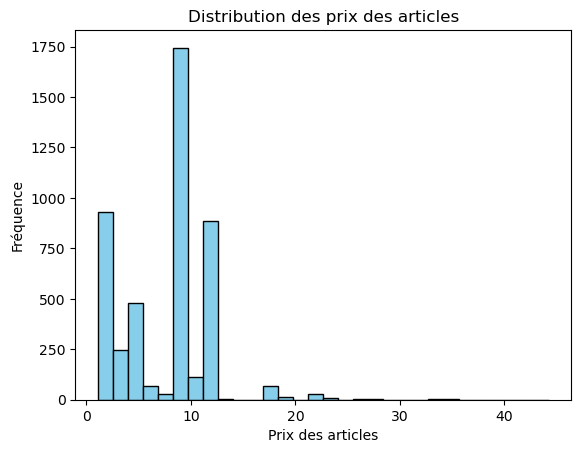

In [111]:
def price_distribution():
    # Afficher un histogramme de la distribution des prix des articles
    plt.hist(chipo['item_price'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution des prix des articles')
    plt.xlabel('Prix des articles')
    plt.ylabel('Fréquence')
    plt.show()
price_distribution()

Statistiques par catégorie d'article :

Créez une fonction category_stats() qui fournit des statistiques descriptives sur les différentes catégories d'articles.

In [112]:
chipo['category'] = np.where(chipo['item_name'].str.contains('Bowl'), 'Bowl', 'Other')

In [117]:
def category_stats():
    # Fournir des statistiques descriptives sur les différentes catégories d'articles
    category_stats = chipo.groupby('category')['quantity'].agg(['count', 'mean', 'std', 'min', 'max'])
    return category_stats
category_stats()

,count,mean,std,min,max
category,,,,,
Bowl,1331,1.050338,0.235285,1,3
Other,3291,1.085992,0.462143,1,15
